In [ ]:
#Importando nuestras librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Repositorios
path_dmc = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Python for analytics/'

In [ ]:
#uploader = files.upload()

In [ ]:
#Cargando el dataset
df = pd.read_csv(path_dmc + 'Titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
#Dimensiones del dataframe
df.shape

(891, 12)

In [ ]:
#Tipos de dato

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Vista preliminar

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Resumen estadístico de variables cuantitativas

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Resumen estadístico de variables categóricas

df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#Cantidad de nulos

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Cantidad de duplicados

df.duplicated().sum()

0

In [ ]:
#Eliminar registros con nulos

df.dropna?

In [ ]:
#Eliminación de variable con muchos nulos

df.drop('Cabin', axis=1, inplace=True)

In [ ]:
#Imputación de valores perdidos

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
#Vista preliminar

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Cantidad de valores únicos por cada columna

for col in df.columns:
  print(col, '==>',df[col].nunique())

PassengerId ==> 891
Survived ==> 2
Pclass ==> 3
Name ==> 891
Sex ==> 2
Age ==> 89
SibSp ==> 7
Parch ==> 7
Ticket ==> 681
Fare ==> 248
Embarked ==> 3


In [ ]:
#Eliminación de variables con muchas categorías

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
#Vista preliminar

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Convirtiendo a número la variable Sex

df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [ ]:
#Vista preliminar

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
#Creación de variables dummies

df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Vista preliminar

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [ ]:
#Separación de predictoras y predicha

X = df.drop('Survived', axis=1)
Y = df['Survived']

In [ ]:
#Creación de muestras de train y test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=22)

In [ ]:
#Objeto del arbol de decisión para clasificar

tree = DecisionTreeClassifier()

In [ ]:
#Entrenamiento del arbol

tree_model = tree.fit(X_train, Y_train)

In [ ]:
#Predicción del modelo

Y_pred = tree_model.predict(X_test)

In [ ]:
#Cálculo del accuracy

accuracy_score(Y_test, Y_pred)

0.746268656716418

In [ ]:
#Matriz de confusión

confusion_matrix(Y_test, Y_pred)

array([[128,  36],
       [ 32,  72]])

In [ ]:
#Reporte con indicadores de clasificación

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       164
           1       0.67      0.69      0.68       104

    accuracy                           0.75       268
   macro avg       0.73      0.74      0.73       268
weighted avg       0.75      0.75      0.75       268



In [ ]:
#Predicción de un nuevo caso

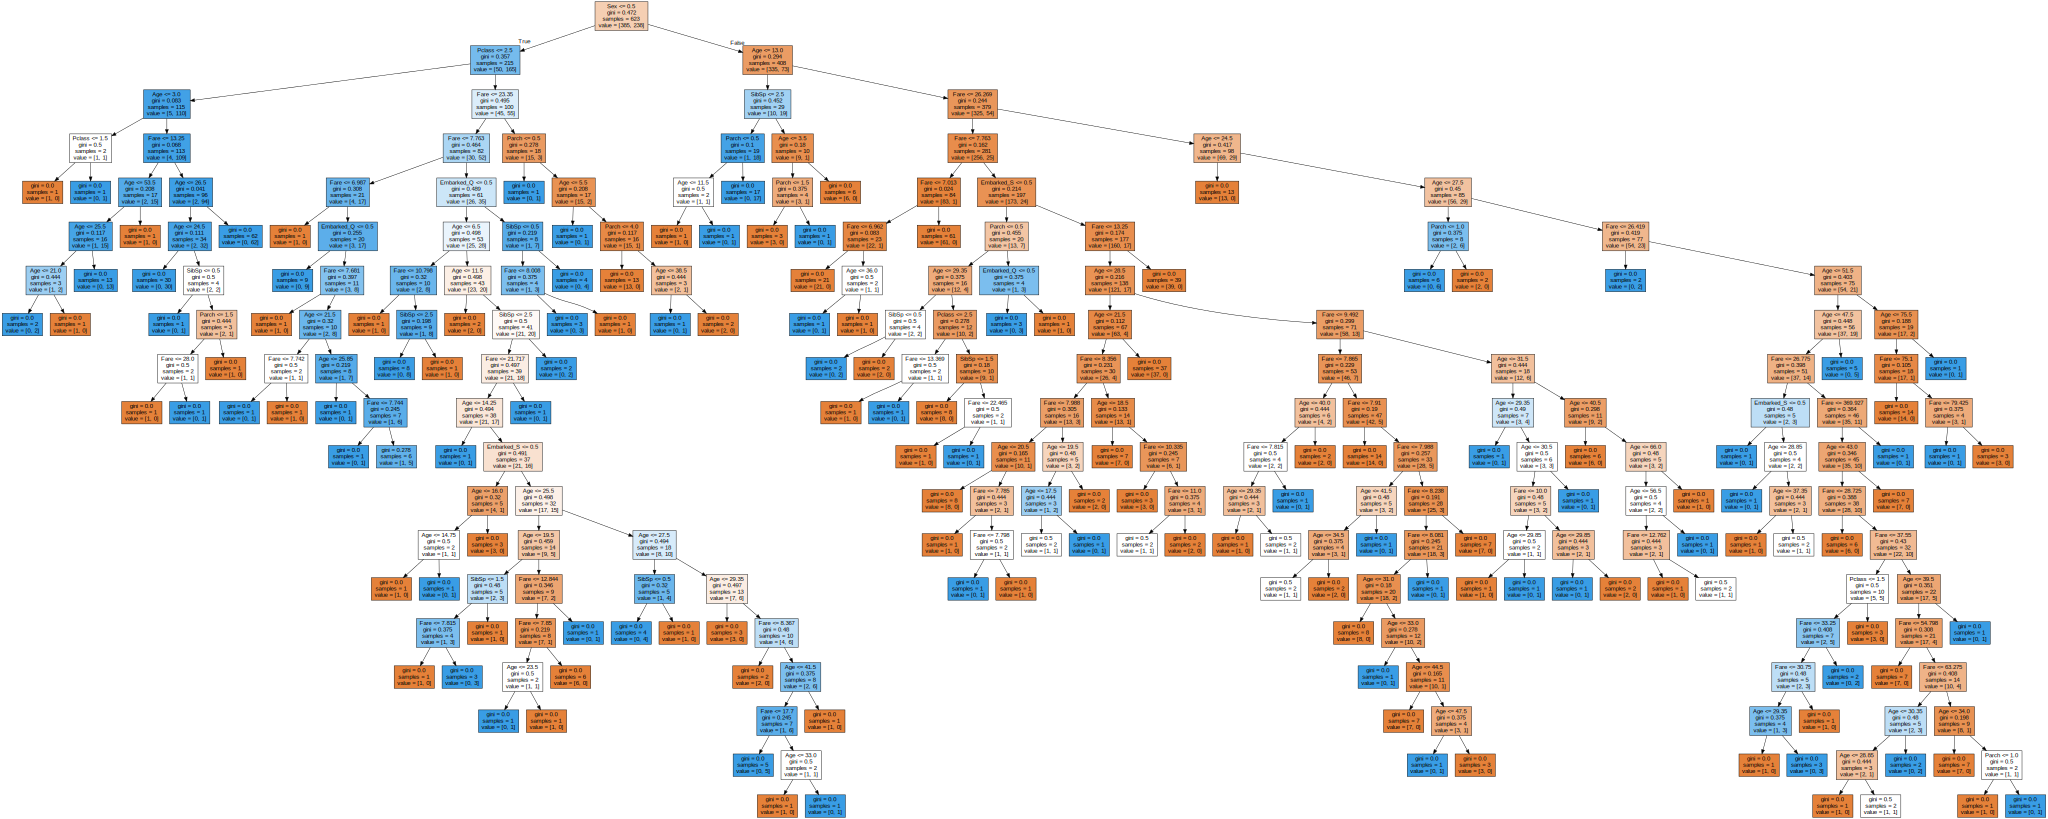

In [ ]:
#Gráfico del árbol de decisión

from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG


graph = Source(export_graphviz(tree_model, feature_names=X.columns, filled=True))
SVG(graph.pipe(format='svg'))

In [ ]:
#Importancia de variables

tree_model.feature_importances_

array([0.07480161, 0.34164226, 0.26547862, 0.06482295, 0.03621949,
       0.19164083, 0.01368639, 0.01170786])

In [ ]:
pd.Series(data=tree_model.feature_importances_, index=X.columns)

Pclass        0.074802
Sex           0.341642
Age           0.265479
SibSp         0.064823
Parch         0.036219
Fare          0.191641
Embarked_Q    0.013686
Embarked_S    0.011708
dtype: float64